In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.timeseries import LombScargle
from sklearn.linear_model import LinearRegression

In [2]:
#import data from google drive for BVR, Stankov et al. data, and extinction coefficient
data1 = pd.read_excel('D:/KULIAH/Data Observasi/hal utk paper/photometry filter b.xlsx')
sxphe_filter_b = pd.DataFrame(data1)
data2 = pd.read_excel('D:/KULIAH/Data Observasi/hal utk paper/photometry filter v.xlsx')
sxphe_filter_v = pd.DataFrame(data2)
data3 = pd.read_excel('D:/KULIAH/Data Observasi/hal utk paper/photometry filter r.xlsx')
sxphe_filter_r = pd.DataFrame(data3)
data4 = pd.read_excel('D:/KULIAH/Data Observasi/hal utk paper/stromgen.xlsx')
sxphe_stankov = pd.DataFrame(data4)
data_star_b = pd.read_excel('D:/KULIAH/Data Observasi/hal utk paper/star filter b.xlsx')
extinction_b = pd.DataFrame(data_star_b)
data_star_v = pd.read_excel('D:/KULIAH/Data Observasi/hal utk paper/star filter v.xlsx')
extinction_v = pd.DataFrame(data_star_v)
data_star_r = pd.read_excel('D:/KULIAH/Data Observasi/hal utk paper/star filter r.xlsx')
extinction_r = pd.DataFrame(data_star_r)

In [3]:
#for the B filter, exposure time = 12s
for i in sxphe_filter_b.index:
    t_hjd_b = sxphe_filter_b['HJD_UTC']
    flux_target_b = sxphe_filter_b['Source-Sky_T1']/sxphe_filter_b['EXPTIME']
    flux_comp_b = sxphe_filter_b['Source-Sky_C2']/sxphe_filter_b['EXPTIME']
    airmass_b = sxphe_filter_b['AIRMASS']
#for the V filter, exposure time = 3s
for i in sxphe_filter_v.index:
    t_hjd_v = sxphe_filter_v['HJD_UTC']
    flux_target_v = sxphe_filter_v['Source-Sky_T1']/sxphe_filter_v['EXPTIME']
    flux_comp_v = sxphe_filter_v['Source-Sky_C2']/sxphe_filter_v['EXPTIME']
    airmass_v = sxphe_filter_v['AIRMASS']
#for the R filter, exposure time = 6s
for i in sxphe_filter_r.index:
    t_hjd_r = sxphe_filter_r['HJD_UTC']
    flux_target_r = sxphe_filter_r['Source-Sky_T1']/sxphe_filter_r['EXPTIME']
    flux_comp_r = sxphe_filter_r['Source-Sky_C2']/sxphe_filter_r['EXPTIME']
    airmass_r = sxphe_filter_r['AIRMASS']
#from the literature data
for i in sxphe_stankov.index:
  t_hjd_lit1 = sxphe_stankov['HJD']
  mag_lit1 = sxphe_stankov['V mag']
  t_hjdplus_lit1 = sxphe_stankov['HJD +2448900']

In [4]:
#if you want to change flux to mag then
mag_b = -2.5 * np.log10(flux_target_b)
mag_v = -2.5 * np.log10(flux_target_v)
mag_r = -2.5 * np.log10(flux_target_r)

In [5]:
#standard star magnitudes
mags_std_b = 11.765
mags_std_v = 10.627
mags_std_r = 9.893
mags_std_i = 9.266
#for extinction
#if you want to change flux to mag then
mag_star_fil_b = -2.5 * np.log10(extinction_b['Source-Sky_T1']/extinction_b['EXPTIME'])
mag_star_fil_v = -2.5 * np.log10(extinction_v['Source-Sky_T1']/extinction_v['EXPTIME'])
mag_star_fil_r = -2.5 * np.log10(extinction_r['Source-Sky_T1']/extinction_r['EXPTIME'])

In [6]:
#fitting linear fit to the standard star data
#for filter b
x_b = extinction_b['AIRMASS'].values.reshape(-1,1)
y_b = mag_star_fil_b.values.reshape(-1,1)
model_b = LinearRegression()
model_b.fit(x_b,y_b)
y_predict_b = model_b.predict(x_b)
#for filter v
x_v = extinction_v['AIRMASS'].values.reshape(-1,1)
y_v = mag_star_fil_v.values.reshape(-1,1)
model_v = LinearRegression()
model_v.fit(x_v,y_v)
y_predict_v = model_v.predict(x_v)
#for filter v
x_r = extinction_r['AIRMASS'].values.reshape(-1,1)
y_r = mag_star_fil_r.values.reshape(-1,1)
model_r = LinearRegression()
model_r.fit(x_r,y_r)
y_predict_r = model_r.predict(x_r)

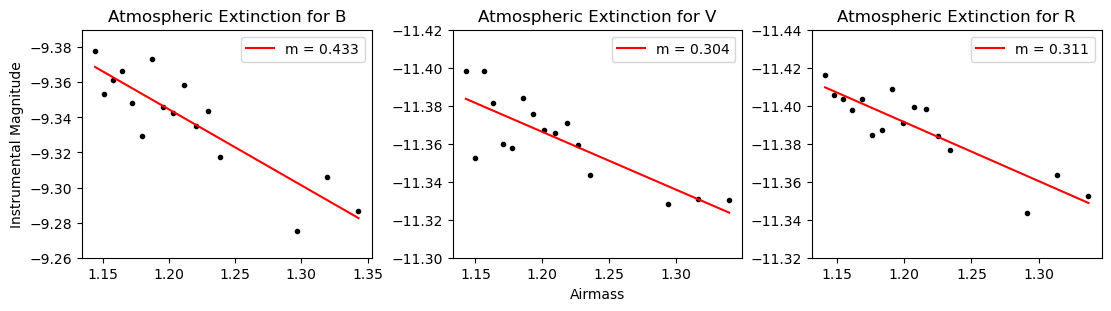

In [7]:
fig, ax = plt.subplots(1,3,figsize=(11,3), constrained_layout=True)
ax[0].scatter(x_b, y_b, c='k', marker='.')
ax[0].plot(x_b, y_predict_b, 'r-', label=f'm = {np.round(model_b.coef_[0,0],3)}')
ax[0].set(title='Atmospheric Extinction for B', ylabel='Instrumental Magnitude', ylim=(-9.26,-9.39))
#ax[0].legend(loc='upper right')
ax[1].scatter(x_v, y_v, c='k', marker='.')
ax[1].plot(x_v, y_predict_v, 'r-', label=f'm = {np.round(model_v.coef_[0,0],3)}')
ax[1].set(title='Atmospheric Extinction for V', xlabel='Airmass', ylim=(-11.3,-11.42))
ax[2].scatter(x_r, y_r, c='k', marker='.')
ax[2].plot(x_r, y_predict_r, 'r-', label=f'm = {np.round(model_r.coef_[0,0],3)}')
ax[2].set(title='Atmospheric Extinction for R', ylim=(-11.32,-11.44))
for i in range(3):
  ax[i].legend(loc='upper right')

In [8]:
#parameter of atmospher
zeropoint_b = model_b.intercept_[0]
zeropoint_v = model_v.intercept_[0]
zeropoint_r = model_r.intercept_[0]
mzp_b = mags_std_b - zeropoint_b
mzp_v = mags_std_v - zeropoint_v
mzp_r = mags_std_r - zeropoint_r
kappa_b = model_b.coef_[0,0]
kappa_v = model_v.coef_[0,0]
kappa_r = model_r.coef_[0,0]
print(f"extinction coefficient for b,v,r, = \n{kappa_b} \n{kappa_v} \n{kappa_r}")
print(' ')
print(f"instrumental zero point for b,v,r, = \n{mzp_b} \n{mzp_v} \n{mzp_r}")

extinction coefficient for b,v,r, = 
0.4332579858278513 
0.30354515086891554 
0.3106350761203113
 
instrumental zero point for b,v,r, = 
21.62953280484737 
22.35749455307288 
21.65714001730027


In [9]:
#calculate the apparent magnitude
mcalib_b = mag_b - 1.3 + mzp_b + (kappa_b * airmass_b)
mcalib_v = mag_v - 0.9 + mzp_v + (kappa_v * airmass_v)
mcalib_r = mag_r - 0.86 + mzp_r + (kappa_r * airmass_r)

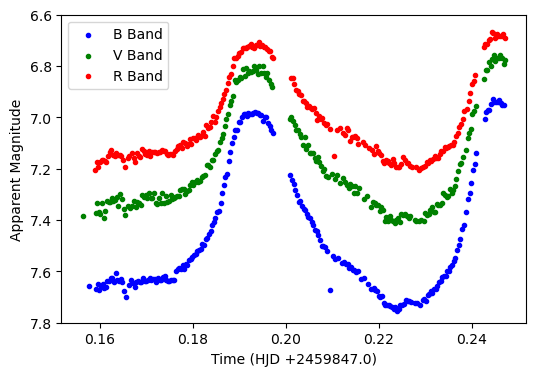

In [13]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(t_hjd_b-2459847.0, mcalib_b, color='b', marker='.', label='B Band')
ax.scatter(t_hjd_v-2459847.0, mcalib_v, color='g', marker='.', label='V Band')
ax.scatter(t_hjd_r-2459847.0, mcalib_r, color='r', marker='.', label='R Band')
ax.set(ylim=(7.8,6.6), xlabel='Time (HJD +2459847.0)', ylabel='Apparent Magnitude')
ax.legend()

In [14]:
print(f'Magnitude in B-band is {round(np.min(mcalib_b),2)} - {round(np.max(mcalib_b),2)} \u00B1 {round(np.std(mcalib_b),2)}')
print(f'Magnitude in V-band is {round(np.min(mcalib_v),2)} - {round(np.max(mcalib_v),2)} \u00B1 {round(np.std(mcalib_v),2)}')
print(f'Magnitude in R-band is {round(np.min(mcalib_r),2)} - {round(np.max(mcalib_r),2)} \u00B1 {round(np.std(mcalib_r),2)}')

Magnitude in B-band is 6.93 - 7.76 ± 0.25
Magnitude in V-band is 6.76 - 7.41 ± 0.2
Magnitude in R-band is 6.67 - 7.21 ± 0.16


In [15]:
#color index
b_v = mcalib_b - mcalib_v[:221]
v_r = mcalib_v[:221] - mcalib_r
obs_bv = np.mean(b_v)
obs_vr = np.mean(v_r)
print(f'the B - V is {round(obs_bv,2)}')
print(f'the V - R is {round(obs_vr,2)}')

the B - V is 0.27
the V - R is 0.17


In [16]:
Teff = 4600 * ((1/((0.92*b_v)+1.7))+(1/((0.92*b_v)+0.62)))
print(f'The Effective Temperature of SX Phe is {round(np.mean(Teff),0)} \u00B1 {round(np.std(Teff),0)} kelvin')

The Effective Temperature of SX Phe is 7656.0 ± 419.0 kelvin


In [17]:
true_bv = 0.27
E_bv = obs_bv - true_bv
err_E_bv = np.std(b_v)
print(f'the E(b-v) is {round(E_bv,3)} \u00B1 {round(err_E_bv,3)}')

the E(b-v) is 0.004 ± 0.06


[Text(0.5, 0, 'Time (HJD)'), Text(0, 0.5, 'V - R'), (0.25, 0.04)]

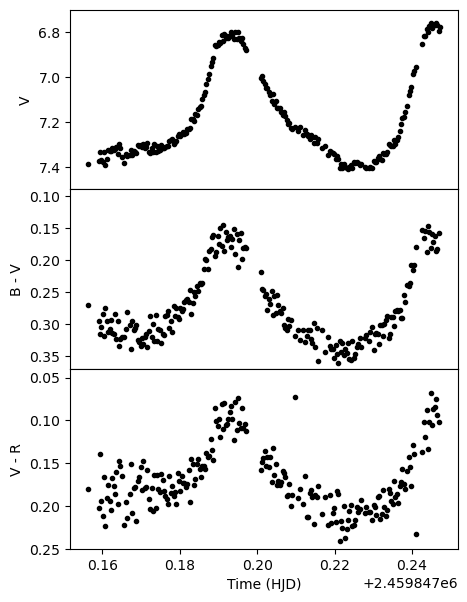

In [34]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(5,7))
fig.subplots_adjust(hspace=0)
m_bv = mcalib_b - mcalib_v
m_vr = mcalib_v - mcalib_r
axs[0].plot(t_hjd_v, mcalib_v, 'k.',label='Pita v')
axs[0].set_ylim(7.5,6.7)
axs[0].set_ylabel('V')
axs[1].plot(t_hjd_v,m_bv, 'k.')
axs[1].set_ylabel('B - V')
axs[1].set_ylim(0.37,0.09)
axs[2].plot(t_hjd_v, m_vr, 'k.')
axs[2].set(xlabel='Time (HJD)', ylabel='V - R', ylim=(0.25,0.04))

[(28.47, 28.77), (7.5, 6.6), Text(0.5, 0, 'HJD +2448900')]

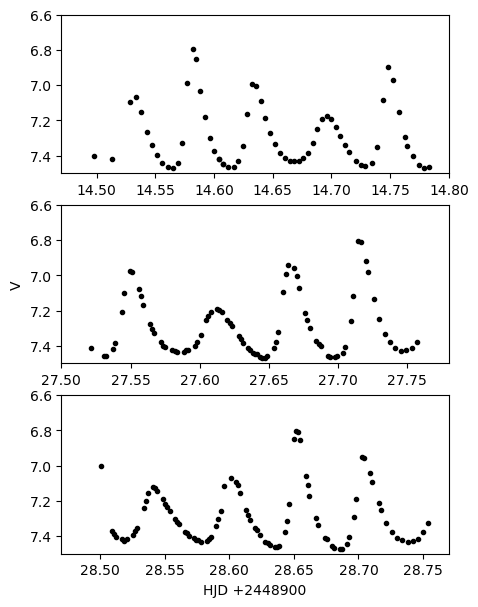

In [41]:
fig, ax2 = plt.subplots(3, 1, figsize=(5,7))
ax2[0].plot(t_hjdplus_lit1,mag_lit1,'k.')
ax2[0].set(xlim=(14.47,14.8), ylim=(7.5,6.6))
ax2[1].plot(t_hjdplus_lit1,mag_lit1,'k.')
ax2[1].set(xlim=(27.5,27.78), ylim=(7.5,6.6), ylabel='V')
ax2[2].plot(t_hjdplus_lit1, mag_lit1,'k.')
ax2[2].set(xlim=(28.47,28.77), ylim=(7.5,6.6), xlabel='HJD +2448900')
#fig.savefig('rollan.jpg',dpi=300,bbox_inches='tight',pad_inches=0.1)

In [43]:
#doin photometry diferential
rel_flux = flux_target_v/flux_comp_v
rel_mag = -2.5 * np.log10(rel_flux/sxphe_filter_v['EXPTIME'])

In [44]:
ls = LombScargle(t_hjd_v, mcalib_v, normalization='psd')
frequency, power = ls.autopower(nyquist_factor=500,minimum_frequency=0.2)
period_days = 1. / frequency
best_frequency_cal = frequency[np.argmax(power)]
best_period = period_days[np.argmax(power)]
print("Best period: {0:.6f} days".format(best_period))
print("Best frequency: {0:.6f} c/d".format(best_frequency_cal))

Best period: 0.056244 days
Best frequency: 17.779553 c/d


In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(frequency, power, color='k')
ax.set(xlim=(0, 200), ylim=(0, 4),
          xlabel='Frequency (c/d)',
          ylabel='Lomb-Scargle Power')
inset = fig.add_axes([0.65, 0.6, 0.2, 0.25])
inset.plot(period_days, power, '-k')
inset.xaxis.set_major_locator(plt.MultipleLocator(0.1))
inset.yaxis.set_major_locator(plt.MultipleLocator(1))
inset.set(xlim=(0, 0.2),
          xlabel='Period (days)',
          ylabel='power')
fig.show()
#fig.savefig('Lomb.jpg',dpi=300,bbox_inches='tight',pad_inches=0.1)

In [ ]:
plt.show()